Import Library

In [1]:
import os
import cv2
import numpy as np
from tabulate import tabulate
from skimage.feature import graycomatrix, graycoprops

Directory

In [2]:
image_directory_training="../Dataset/PreProcessed/5_Label/DataSet_Training"
image_directory_testing="../Dataset/PreProcessed/5_Label/DataSet_Testing"

Ekstraksi Fitur RGB

In [3]:
def ef_rgb_training(image_directory_training):

   # membuat list untuk menyimpan hasil ekstraksi fitur
  features_training = []
    
  # melakukan ekstraksi fitur pada setiap folder
  for a, (root, dirs, files) in enumerate(os.walk(image_directory_training), start=0):

    # mengambil semua file gambar di dalam folder
    image_files = [f for f in files if f.endswith('.jpg')]
    

    # melakukan ekstraksi fitur pada setiap gambar
    for image_file in image_files:
      # membaca gambar
      image = cv2.imread(os.path.join(root, image_file))

      # mengubah gambar ke dalam format RGB
      rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

      # mengambil nilai red (R) dari gambar
      red = rgb[:, :, 0]

      # mengambil nilai green (G) dari gambar
      green = rgb[:, :, 1]

      # mengambil nilai blue (B) dari gambar
      blue = rgb[:, :, 2]
      
      # menambahkan nilai RGB ke dalam list
      features_training.append([np.mean(red), np.mean(green), np.mean(blue), a])
                
  return features_training


def ef_rgb_testing(image_directory_testing):

   # membuat list untuk menyimpan hasil ekstraksi fitur
  features_testing = []

  # melakukan ekstraksi fitur pada setiap folder
  for a, (root, dirs, files) in enumerate(os.walk(image_directory_testing), start=0):

    # mengambil semua file gambar di dalam folder
    image_files = [f for f in files if f.endswith('.jpg')]

    # melakukan ekstraksi fitur pada setiap gambar
    for image_file in image_files:
      # membaca gambar
      image = cv2.imread(os.path.join(root, image_file))

      # mengubah gambar ke dalam format RGB
      rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

      # mengambil nilai red (R) dari gambar
      red = rgb[:, :, 0]

      # mengambil nilai green (G) dari gambar
      green = rgb[:, :, 1]

      # mengambil nilai blue (B) dari gambar
      blue = rgb[:, :, 2]

      # menambahkan nilai RGB ke dalam list
      features_testing.append(
          [np.mean(red), np.mean(green), np.mean(blue), a])

  return features_testing

Inisialisasi Data Training

In [4]:
train_data = ef_rgb_training(image_directory_training)

# header tabel rgb
header = ["Red (R)", "Green (G)", "Blue (B)", "Label"]

# Mencetak tabel menggunakan tabulate
print(tabulate(train_data, headers=header, tablefmt="grid"))

+-----------+-------------+------------+---------+
|   Red (R) |   Green (G) |   Blue (B) |   Label |
+===========+=============+============+=========+
|   145.725 |     164.321 |   116.261  |       1 |
+-----------+-------------+------------+---------+
|   147.54  |     162.782 |   131.682  |       1 |
+-----------+-------------+------------+---------+
|   114.896 |     137.666 |   104.003  |       1 |
+-----------+-------------+------------+---------+
|   145.723 |     164.32  |   116.264  |       1 |
+-----------+-------------+------------+---------+
|   114.898 |     137.665 |   103.996  |       1 |
+-----------+-------------+------------+---------+
|   120.316 |     145.948 |   103.724  |       1 |
+-----------+-------------+------------+---------+
|   120.32  |     145.945 |   103.721  |       1 |
+-----------+-------------+------------+---------+
|   122.087 |     146.205 |    99.9353 |       1 |
+-----------+-------------+------------+---------+
|   122.087 |     146.204 |    

Inisialisasi Data Testing

In [5]:
test_data = ef_rgb_testing(image_directory_testing)

# header tabel rgb
header = ["Red (R)", "Green (G)", "Blue (B)", "Label"]

# Mencetak tabel menggunakan tabulate
print(tabulate(test_data, headers=header, tablefmt="grid"))

+-----------+-------------+------------+---------+
|   Red (R) |   Green (G) |   Blue (B) |   Label |
+===========+=============+============+=========+
|   120.796 |     143.068 |    96.4681 |       1 |
+-----------+-------------+------------+---------+
|   107.378 |     135.14  |    95.3781 |       1 |
+-----------+-------------+------------+---------+
|   133.7   |     151.153 |   108.586  |       1 |
+-----------+-------------+------------+---------+
|   112.186 |     137.215 |    96.2104 |       1 |
+-----------+-------------+------------+---------+
|   144.31  |     124.742 |   111.822  |       2 |
+-----------+-------------+------------+---------+
|   155.351 |     159.907 |   102.93   |       2 |
+-----------+-------------+------------+---------+
|   131.548 |     124.621 |   102.566  |       2 |
+-----------+-------------+------------+---------+
|   182.054 |     156.544 |   123.476  |       2 |
+-----------+-------------+------------+---------+
|   146.442 |     171.629 |   1

Klasifikasi Model Naive Bayes

In [6]:
X_train = [data[:-1] for data in train_data]
y_train = [data[-1] for data in train_data ]

In [7]:
from sklearn.naive_bayes import GaussianNB

model = GaussianNB()
model.fit(X_train, y_train)

GaussianNB()

In [8]:
X_test = [data[:-1] for data in test_data]
y_true = [data[-1] for data in test_data]

In [9]:
y_pred = model.predict(X_test)
y_pred

array([1, 1, 5, 1, 2, 4, 1, 2, 4, 1, 1, 3, 3, 4, 3, 5, 4, 5, 4, 4])

In [10]:
# Menggabungkan data uji dan hasil prediksi
result_table = []
for data, pred in zip(test_data, y_pred):
    # Mengambil nilai fitur berdasarkan indeks
    feature_values = [data[i] for i in range(len(data))]
    result_row = feature_values + [pred]
    result_table.append(result_row)

# header tabel rgb
header = ["Red (R)", "Green (G)", "Blue (B)","True Label", "Predict Label"]

# Mencetak tabel menggunakan tabulate
print(tabulate(result_table, headers=header, tablefmt="grid"))


+-----------+-------------+------------+--------------+-----------------+
|   Red (R) |   Green (G) |   Blue (B) |   True Label |   Predict Label |
+===========+=============+============+==============+=================+
|   120.796 |     143.068 |    96.4681 |            1 |               1 |
+-----------+-------------+------------+--------------+-----------------+
|   107.378 |     135.14  |    95.3781 |            1 |               1 |
+-----------+-------------+------------+--------------+-----------------+
|   133.7   |     151.153 |   108.586  |            1 |               5 |
+-----------+-------------+------------+--------------+-----------------+
|   112.186 |     137.215 |    96.2104 |            1 |               1 |
+-----------+-------------+------------+--------------+-----------------+
|   144.31  |     124.742 |   111.822  |            2 |               2 |
+-----------+-------------+------------+--------------+-----------------+
|   155.351 |     159.907 |   102.93  

In [11]:
from sklearn.metrics import classification_report

print(classification_report(y_true, y_pred))

              precision    recall  f1-score   support

           1       0.50      0.75      0.60         4
           2       1.00      0.50      0.67         4
           3       0.33      0.25      0.29         4
           4       0.17      0.25      0.20         4
           5       0.33      0.25      0.29         4

    accuracy                           0.40        20
   macro avg       0.47      0.40      0.41        20
weighted avg       0.47      0.40      0.41        20



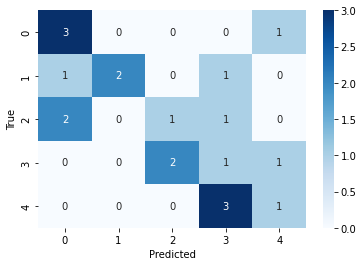

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix


# menghitung confusion matrix
conf_mat = confusion_matrix(y_true, y_pred)

sns.heatmap(conf_mat, annot=True, cmap='Blues', fmt='d')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [13]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_true, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.4
